##### Dummy variables 

#### Categorical Variables and One Hot Encoding yöntemleri

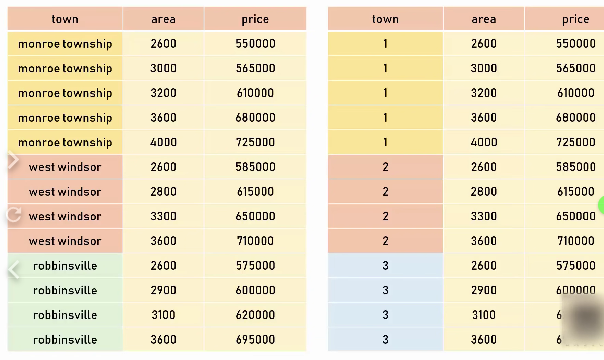 

elimizde olan bu verileri öncelikle bu şekilde düzenleyeceğiz.

bunun için one hot encoding kullanacağız.


* One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. 



* Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir. Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışında ki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir. Örneğin aşağıda 3 kategoride veri vardır apple,chicken ve broccoli bu alanlar binary olarak ayrıştırıldığında Apple için ilk satır 1 iken diğerleri 0 oluyor Diğer veri içinde aynı şekilde sayısal veriye çevirme işlemi devem ediyor. 

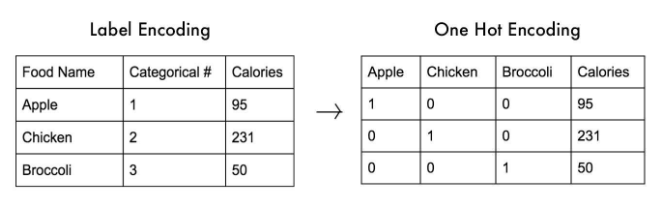 

* kendi verilerimiz üzerinden gidersek. yukarıdaki 3 özellikli veri setinde town kısmına one hot encoding uygularsak. 


* kategorilerin her biri için yeni bir sütun oluşturulur. 
    monroe township > west winstor > robinsville
    
    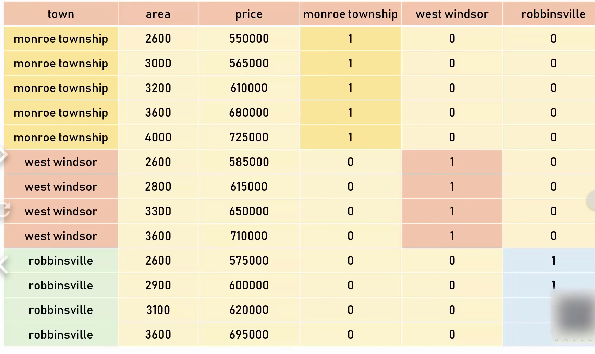
    


#### Using pandas to create dummy variables

* ilk olarak sütunları oluşturmak için dummy veriler oluşturulur. Bunun için pandas kütüphanesinin metodu var

    pd.get_dummies(df.metodun_uygulanacağı_stüun_adı)
    
  Bu metod çalıştırıldığında üç sütun döndürür. 
  
  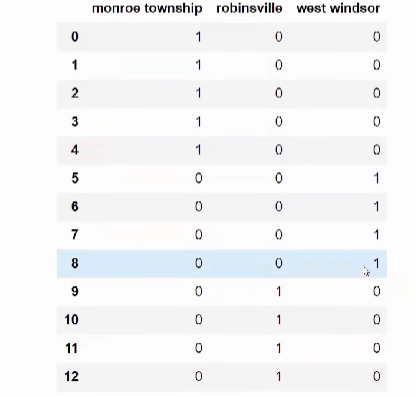
  
  
* Ardından elde edilen bu dummy veriler dataFrame ile birleştirilir. Bunun için "concat" metodu kullanılır.

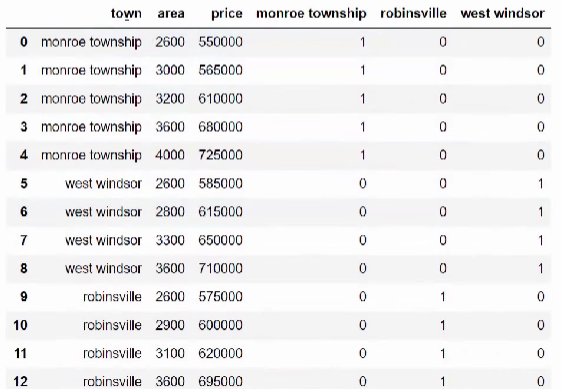


* şimdi yapılacak ikinci adım bir dummy verisini bırakmak. 
    Bunun nedeni; 
    
   Makine öğrenmesi modeli kurulurken yukarıdaki iklim örneğinde olduğu gibi 3 farklı grup için 3 dummy (kukla) değişken oluşturulur ancak bu kolonlardan bir tanesi silinir (K - 1). Bu işlemin yapılmasındaki amaç Multicollinearity yani çoklu bağlanım sorununu ortadan kaldırmaktır.
   
   Bunun için drop metodu kullanılır.
   
   
* Bir veri bırakıldığında da linear regression çalışır çünkü bu bilinçli bir modeldir. Dummy veriables durumunun farkındadır ve otomatik olarak bırakır. Ama onu programcının bırakması daha iyi bir uygulamadır. 



* Şimdi bu çıkarılmış veri sonrasında lineer regresyon uygulanır.


* yeni veri ekleneceğinde bölgeyi belirtmek için bir vektör verilir. 
    ör: yukarıdaki örnek için west windsor çıkarıldığında 
    robinsville ile ilgili veri verildiğinde [[area,0,1]] şeklinde belirtilir.


* Yapılan modelin ne kadar mantıklı olduğunu öğrenmek için; 
    model dot score metodu kullanılabilir. 
    x ve y verilerek x deki tüm satırlar için tahmin edilen değeri hesaplar ve ardından tahmin verisiyle gerçek veriyi karşılaştırır.  
    model.score(x,y) şeklinde kullanılır.

In [202]:
import pandas as pd

In [204]:
df= pd.read_csv("dummy_oneHotEncoding_homeprice.csv")
# df

In [205]:
dummies=pd.get_dummies(df.town)
#dummies

In [206]:
merged= pd.concat([df,dummies],axis="columns")
#merged

In [207]:
last= merged.drop(["town"], axis="columns")
#last

In [208]:
last=last.drop(["west windsor"], axis="columns")
#last

In [209]:
X=last.drop("price", axis='columns')
#X

In [210]:
y=last.price

In [211]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [212]:
model.fit(X,y)

LinearRegression()

In [213]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [214]:
model.score(X,y)

0.9573929037221873

In [215]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [216]:
model.predict([[2800,0,1]])

array([590775.63964739])

#### OneHotEncoder

One Hot encoder kullanmak için öncelikle label encoder'a ihtiyaç vardır. (etiket kodlaması) 
Bunun için sklearn.preprocessing  de bulunan LabelEncoder kullanılır. 
    from sklearn.preprocessing import LabelEncoder
    

Ardından sınıf nesnesi oluşturulur ve orjinal dataframe de kullanılır 
* dfle= df
* le= LabelEncoder() kullandıktan sonra bununla df içerisinde
* le.fit_transform (df.sütunadı) şeklinde kullanarak onu dönüştürme işlemi yapar.
* monroe =0, west windsor =2, robinsville =1
          
          Bunlar town sütununa uygulamak için = dfle.town=le.fit_transform (df.sütunadı) kullanılırsa artık town kısmında sayılar olur.
          
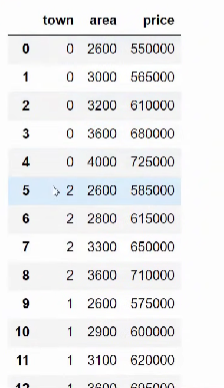

* sklearn.preprocessing kullanarak OneHotEncoder dahil edilir. 



* Daha sonra bu fonksiyon kullanılarak kategorik özellikler belirtilmeli. 
    onehotencoding= OneHotEncoder(categorical_features=[0]) şeklinde özellik ne olursa olsun 0. indis sağlanır. 


diziye dönüştürmek için yapılacak diğer şey 


* bu özelliği fit_transform(X).toarray() ile diziye dönüştürülür.


X görünüşü bu şekli alıyor.

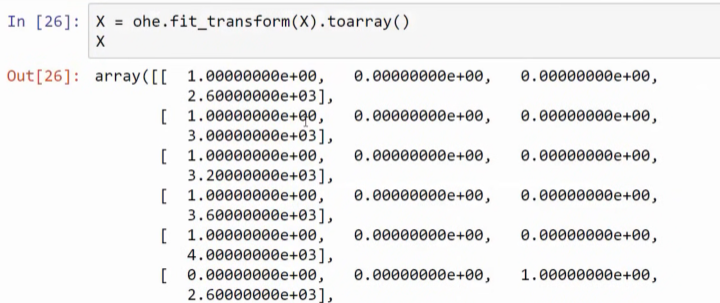


* üç sıfır kukla sıfır var bu yüzden sütunlardan biri bırakılır.
    Bunun için tüm satırları alıp ardından 1 den itibaren de sütunları alacak dizi değişimi yapılır.
    
    
* X=X[:, 1:]


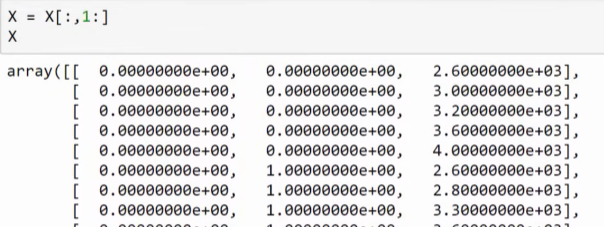


* ardından bir model oluşturulurken bu X verisi kullanılır.





In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [219]:
dfle=df
dfle.town=le.fit_transform(dfle.town)
# dfle

In [220]:
X=dfle[["town","area"]].values
# X

In [53]:
y=dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [56]:
ct= ColumnTransformer([('town', OneHotEncoder(),[0])], remainder="passthrough")

In [57]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('town', OneHotEncoder(), [0])])

In [58]:
X= ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [59]:
X=X[:, 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [60]:
model.fit(X,y)

LinearRegression()

In [61]:
model.predict([[0,1,3400]])

array([681241.6684584])

In [62]:
model.predict([[1,0,2800]])

array([590775.63964739])

### Exercise - Örnek Soru

###### Use Linear 

In [222]:
df2=pd.read_csv("dummy_oneHotEncoding_carprice_.csv")
df2

,Car_Model,Mileage,Sell_Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


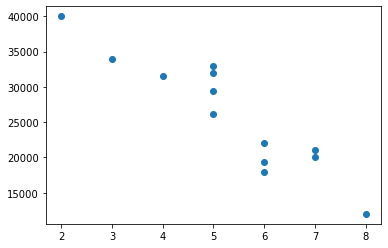

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df2["Age(yrs)"],df2['Sell_Price($)'])

In [85]:
dummie=pd.get_dummies(df2.Car_Model)
dummie

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [89]:
marge=pd.concat([df2,dummie], axis="columns")
marge

,Car_Model,Mileage,Sell_Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [91]:
final=marge.drop(["Car_Model"], axis="columns")
final

,Mileage,Sell_Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [92]:
final= final.drop(["Mercedez Benz C class"], axis="columns")
final

,Mileage,Sell_Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [100]:
X1= final.drop(["Sell_Price($)"], axis="columns")
X1

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [101]:
y1= final["Sell_Price($)"]
# y1

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [99]:
carModel= LinearRegression()

In [102]:
carModel.fit(X1,y1)

LinearRegression()

In [105]:
carModel.predict(X1)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [106]:
carModel.score(X1,y1)

0.9417050937281083

In [108]:
carModel.predict([[45000,4,0,0]])

array([36991.31721061])

In [110]:
carModel.predict([[86000,7,0,1]])

array([11080.74313219])

##### use OneHotEncoder

In [111]:
l=LabelEncoder()

In [123]:
df2l=df2
df2l["Car_Model"] = l.fit_transform(df2l["Car_Model"])
df2l

,Car_Model,Mileage,Sell_Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [182]:
X2=df2l[["Car_Model","Mileage","Age(yrs)"]].values
X2

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [183]:
y2= df2l["Sell_Price($)"].values
y2

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [184]:
ct2 = ColumnTransformer([('Car_Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [185]:
import numpy as np

In [186]:
X2 = ct2.fit_transform(X2)
X2

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [187]:
X2=X2[:,1:]
X2

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [188]:
model3 = LinearRegression()

In [189]:
model3.fit(X2,y)

LinearRegression()

In [190]:
model3.score(X2,y)

0.9417050937281082

In [191]:
model3.predict([[0,1,45000,4]])

array([36991.31721062])

In [199]:
print(type(model3))

<class 'sklearn.linear_model._base.LinearRegression'>
